In [1]:
# Source: https://towardsdatascience.com/deep-guide-into-styling-plots-delivering-effective-visuals-12e40107b380
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# No need to include %matplotlib inline magic command. These things come built-in now.

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
nobel = pd.read_csv('archive.csv', parse_dates=['Birth Date'])

In [6]:
list(nobel.columns)

['Year',
 'Category',
 'Prize',
 'Motivation',
 'Prize Share',
 'Laureate ID',
 'Laureate Type',
 'Full Name',
 'Birth Date',
 'Birth City',
 'Birth Country',
 'Sex',
 'Organization Name',
 'Organization City',
 'Organization Country',
 'Death Date',
 'Death City',
 'Death Country']

In [7]:
# Drop unnecessary columns
nobel.drop([
    'Organization Name', 'Organization City', 'Organization Country',
    'Motivation', 'Death Date', 'Death Country', 'Death City'
], inplace=True, axis='columns')

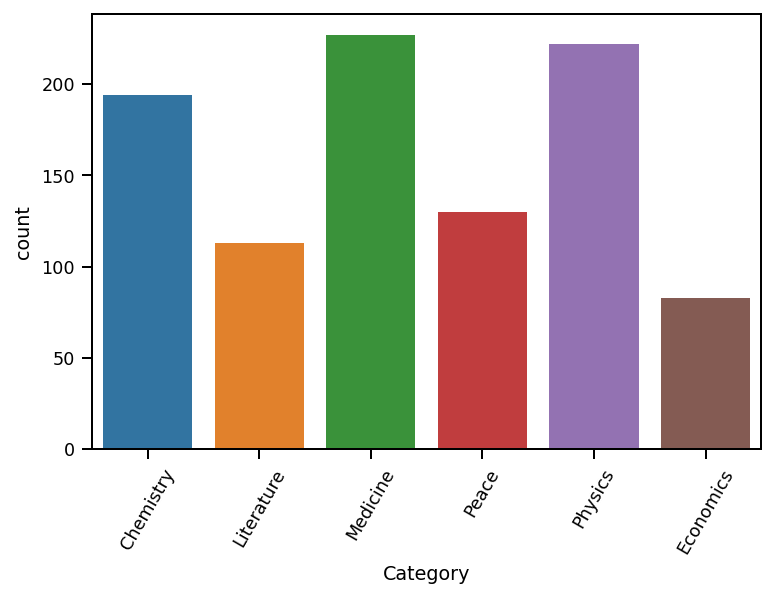

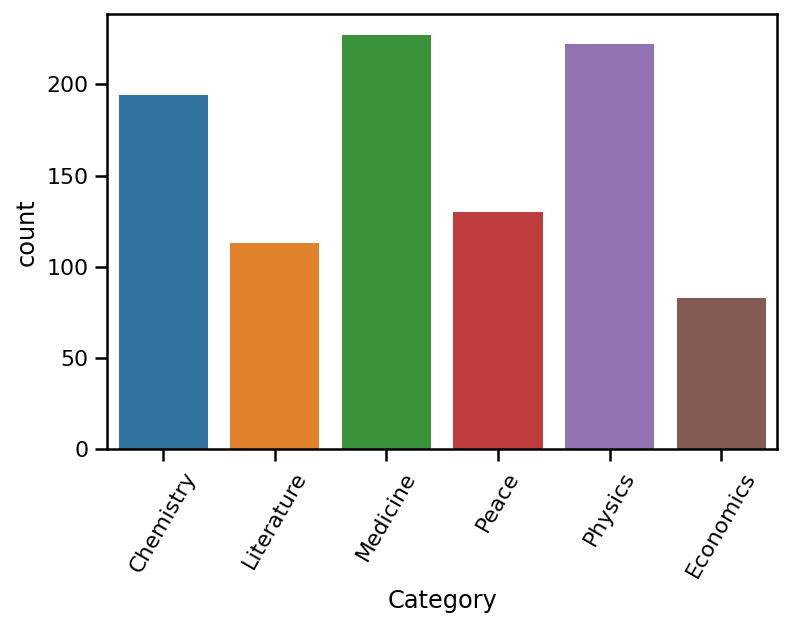

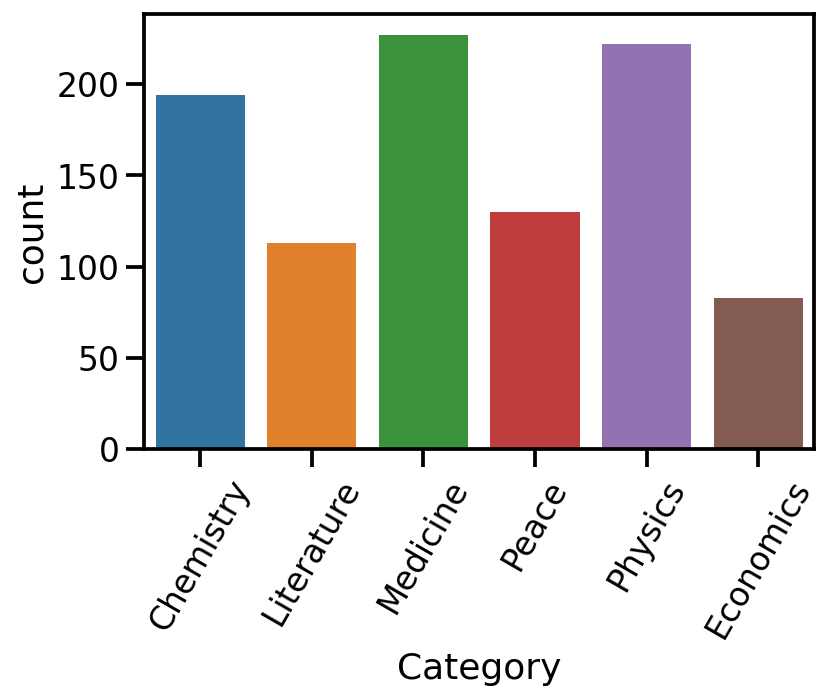

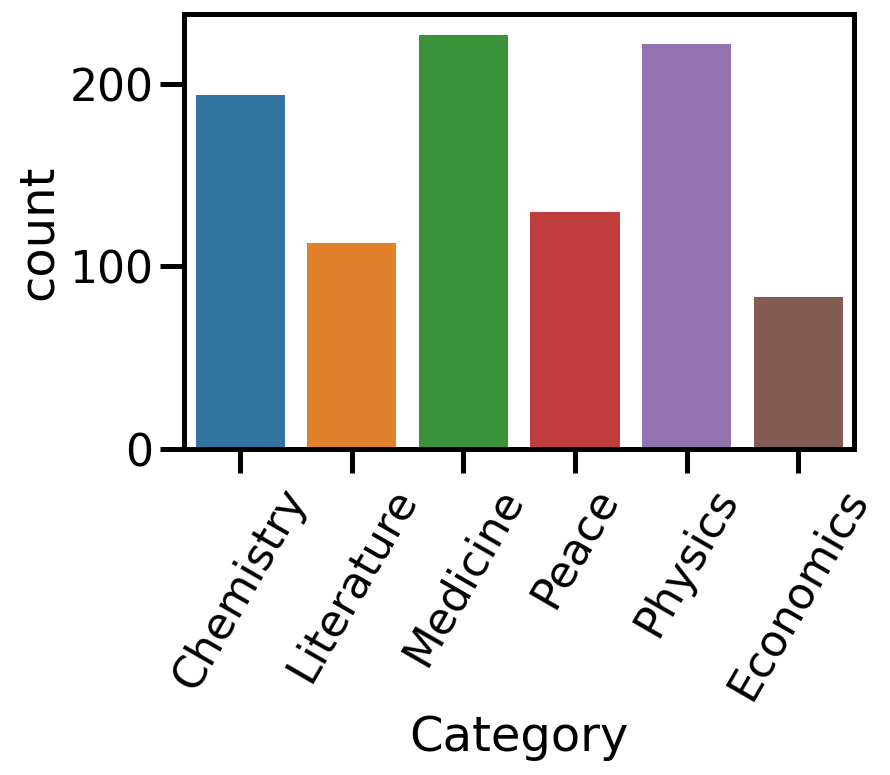

In [9]:
contexts = ['paper', 'notebook', 'talk', 'poster']

# Create a function to set context
def example_context(context):
    with sns.plotting_context(context):
        sns.countplot(nobel['Category'])
        plt.xticks(rotation=60)
        plt.show();

# Loop over contexts
for context in contexts:
    example_context(context);

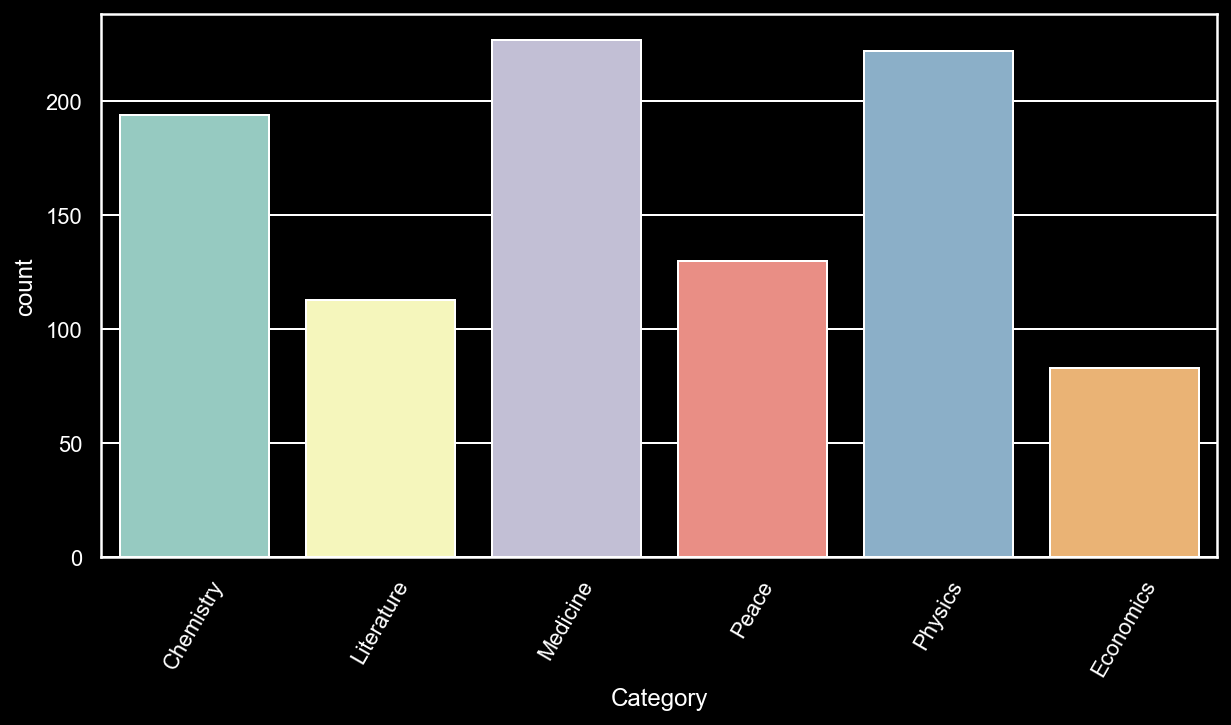

In [19]:
# Set the style
plt.style.use('dark_background')
#sns.set_context('notebook')
#sns.set_style('darkgrid')
# Plot a countplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(nobel['Category'])
plt.xticks(rotation=60)
plt.show();

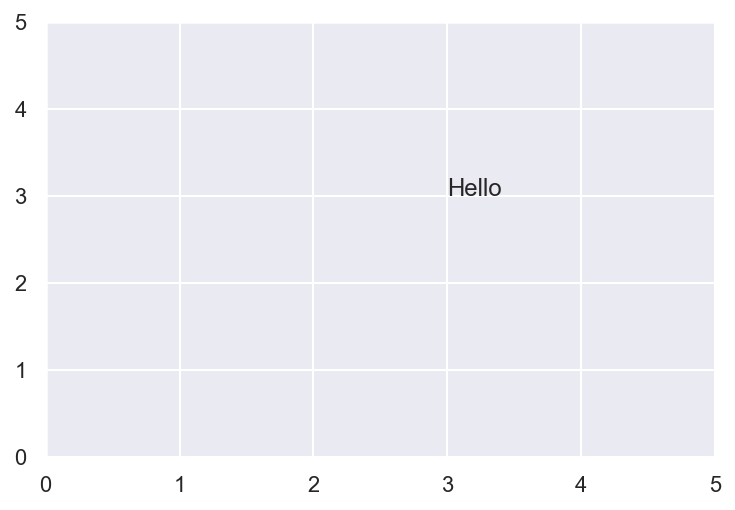

In [13]:
sns.set_style('darkgrid')
sns.set_context('notebook')
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello', xy=(3, 3), xycoords='data')
plt.show();

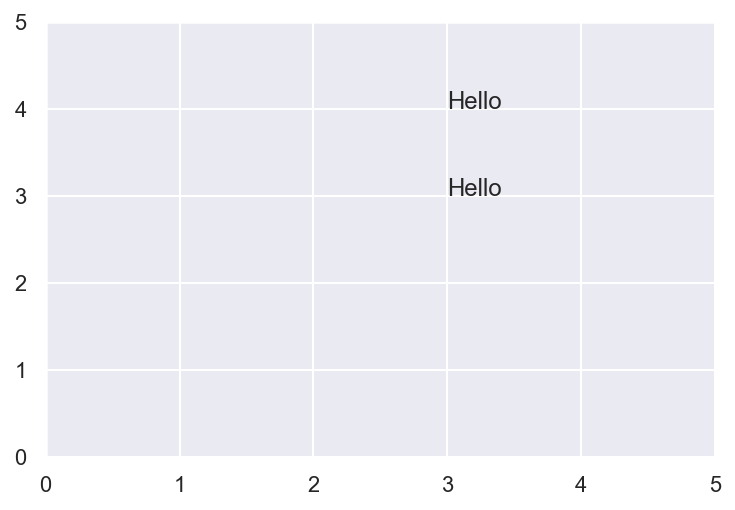

In [14]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello', xy=(3, 3), xycoords='data')
# Place a text one point above
ax.annotate('Hello', xy=(3, 4), xycoords='data')
plt.show();

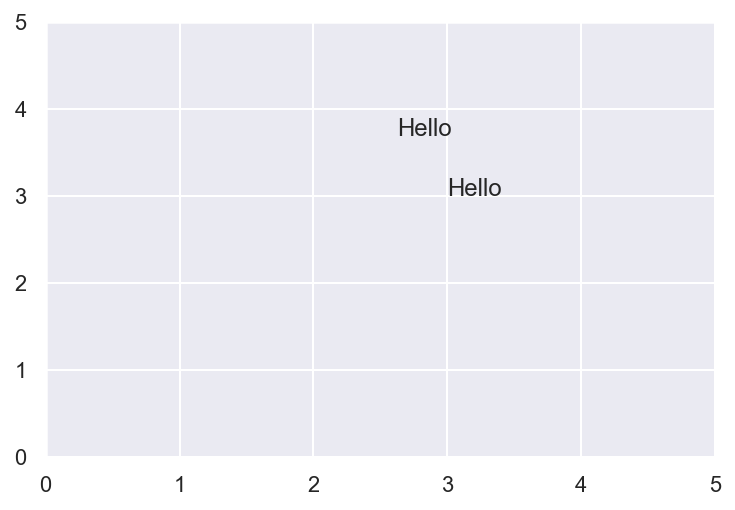

In [15]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello',           # Text to be placed
            xy=(3, 3),         # Reference point
            xycoords='data',   # Type of coordinate
            xytext=(-25, 30),  # How many points off from the reference point
            textcoords='offset points')   # Use offset points
ax.annotate('Hello', xy=(3, 3), xycoords='data')
plt.show();

In [25]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


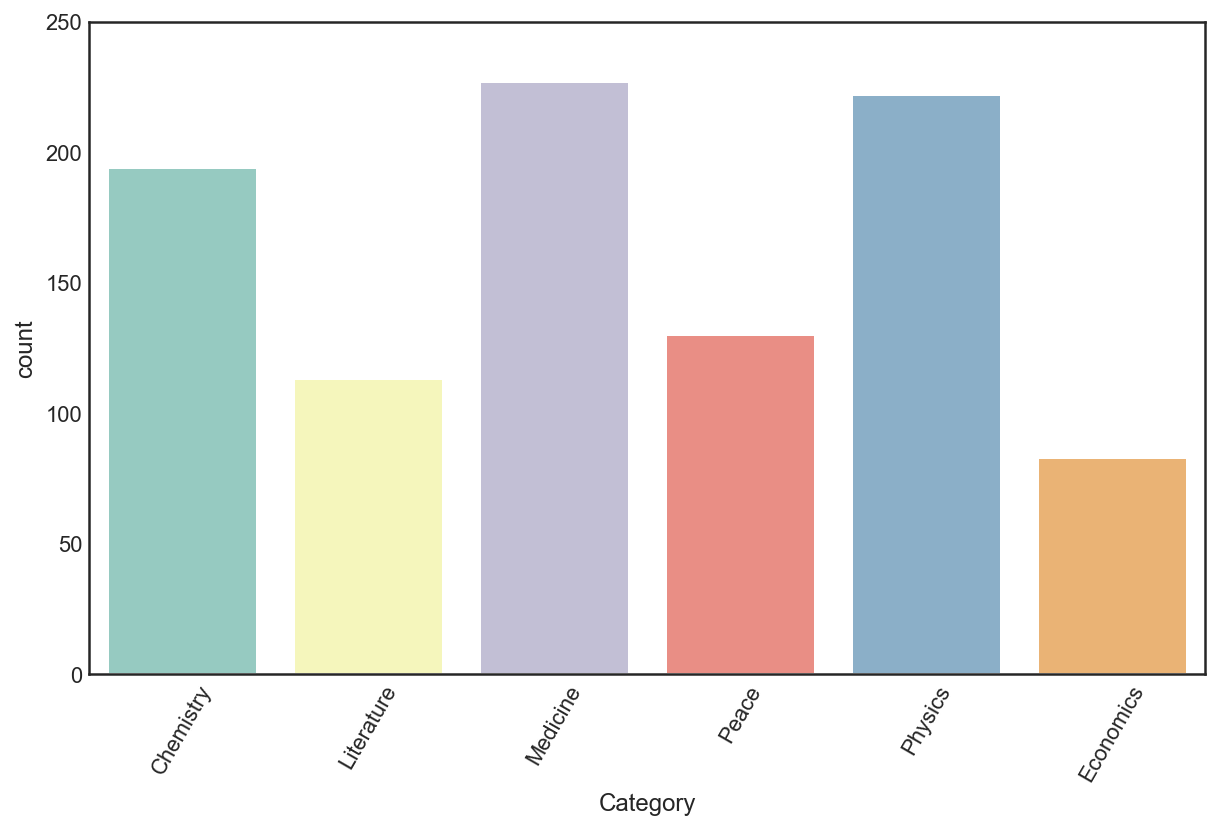

In [26]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10, 6))
# Store the countplot to a variable
plot = sns.countplot(nobel['Category'], ax=ax)
ax.set(ylim=(0, 250))
plt.xticks(rotation=60)
plt.show(plot);

In [17]:
print(plot)
print(type(plot))

AxesSubplot(0.125,0.125;0.775x0.755)
<class 'matplotlib.axes._subplots.AxesSubplot'>


In [20]:
for patch in plot.patches:
    print(
        f"Height: {patch.get_height()}, x_coordinate:{patch.get_x()}, width: {patch.get_width()}"
    )

Height: 194, x_coordinate:-0.4, width: 0.8
Height: 113, x_coordinate:0.6, width: 0.8
Height: 227, x_coordinate:1.6, width: 0.8
Height: 130, x_coordinate:2.6, width: 0.8
Height: 222, x_coordinate:3.6, width: 0.8
Height: 83, x_coordinate:4.6, width: 0.8


[(0.0, 250.0)]

Text(0.0, 194, '194')

Text(1.0, 113, '113')

Text(2.0, 227, '227')

Text(3.0, 130, '130')

Text(4.0, 222, '222')

Text(5.0, 83, '83')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

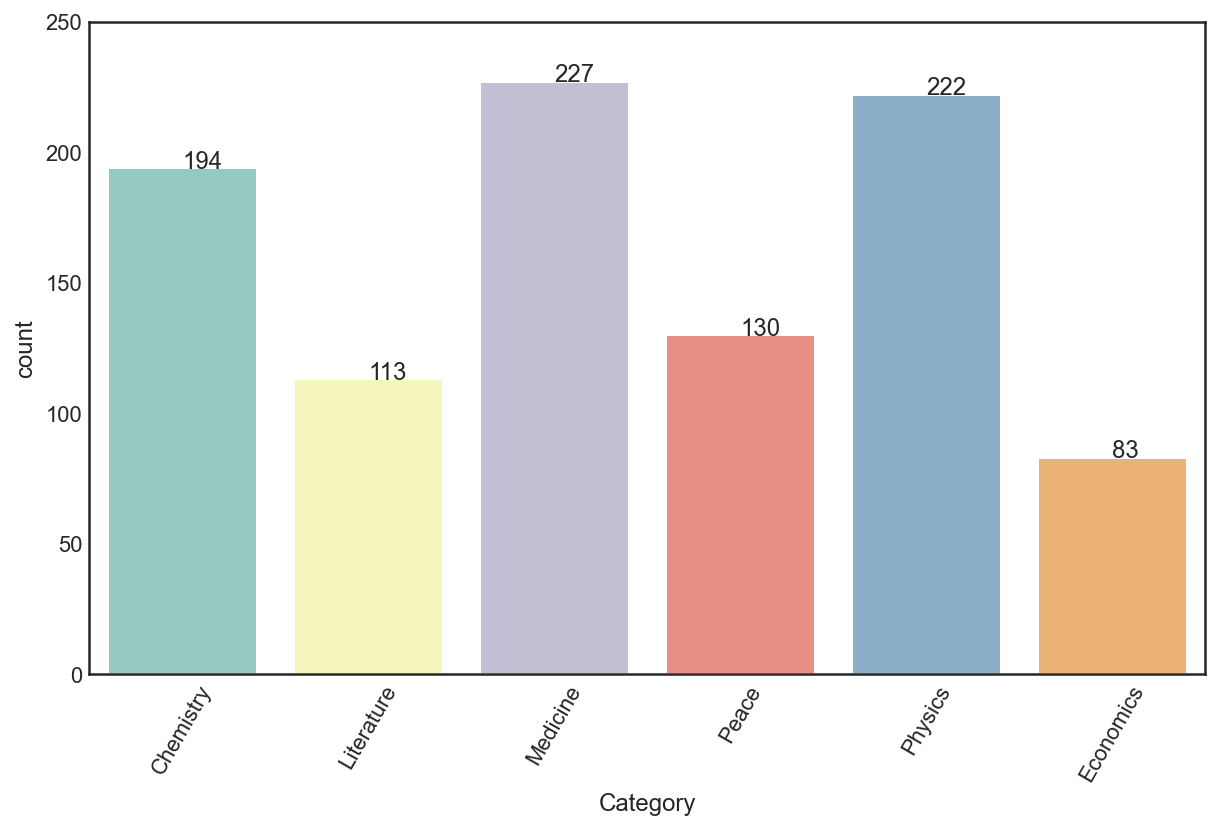

In [27]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Store the plot for further tasks
plot = sns.countplot(nobel['Category'], ax=ax)
# Make room for annotations by increasing the height of the plot
ax.set(ylim=(0, 250))
# Loop over rectangles
for patch in plot.patches:
    # Place texts
    ax.annotate(s=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2,
                    patch.get_height()))

plt.xticks(rotation=60)
plt.show(plot)

[(0.0, 250.0)]

Text(0, 15, '194')

Text(0, 15, '113')

Text(0, 15, '227')

Text(0, 15, '130')

Text(0, 15, '222')

Text(0, 15, '83')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

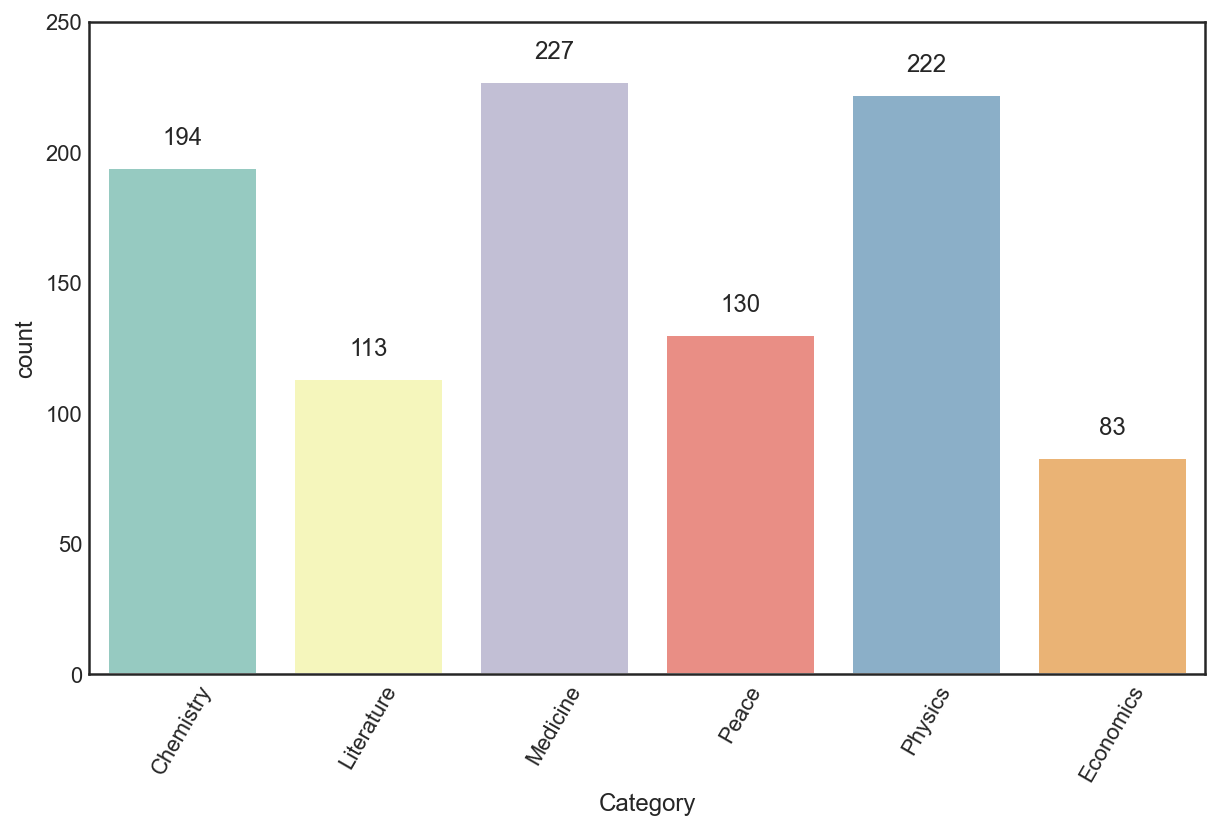

In [30]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Store the plot for further tasks
plot = sns.countplot(nobel['Category'], ax=ax)
# Make room for annotations by increasing the height of the plot
ax.set(ylim=(0, 250))
# Loop over rectangles
for patch in plot.patches:
    # Place texts
    ax.annotate(s=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, 
                      patch.get_height()),
                verticalalignment='center',    # Center the text 
                horizontalalignment='center',  # from both directions
                xytext=(0, 15),
                textcoords='offset points')

plt.xticks(rotation=60)
plt.show(plot)